# k-鄰近演算法回歸(k-Nearest Neighbor Regression)

##### 先引入我們需要的packages

In [2]:
import os 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import mplfinance as mpf

# 載入股票資料

In [7]:
PATH="C:\\Users\\user\\Documents\\股票資料"
os.chdir(PATH)                                               
file_list = os.listdir()
df = open(PATH+"\\"+file_list[0], "r")
title=df.readline()
data = pd.read_csv(df)
data=data.drop(['日期','Unnamed: 9'],axis=1)
data=data.dropna()
All_data=data
for i in range(1,12):
    df = open(PATH+"\\"+file_list[i], "r")
    title=df.readline()
    data = pd.read_csv(df)
    data=data.drop(['日期','Unnamed: 9'],axis=1)
    data=data.dropna()
    All_data=pd.concat([All_data,data])
All_data

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,"94,615,088","595,334,753",6.30,6.34,6.25,6.27,-0.27,"14,465"
1,"51,164,851","323,037,712",6.34,6.37,6.27,6.28,0.01,"8,351"
2,"102,385,100","633,081,177",6.27,6.28,6.11,6.13,-0.15,"16,046"
3,"58,021,386","360,429,804",6.13,6.30,6.12,6.23,0.1,"8,525"
4,"47,830,340","300,581,307",6.32,6.34,6.23,6.26,0.03,"7,263"
...,...,...,...,...,...,...,...,...
14,"454,014,510","12,339,561,345",27.05,28.10,26.05,27.75,0.8,"111,634"
15,"446,470,419","12,685,577,065",28.20,29.00,27.65,28.90,1.15,"95,475"
16,"606,516,014","18,182,251,042",29.85,30.70,29.25,29.75,0.85,"139,916"
17,"707,664,064","21,952,461,656",30.10,32.00,30.10,31.15,1.4,"157,518"


# 繪製K線

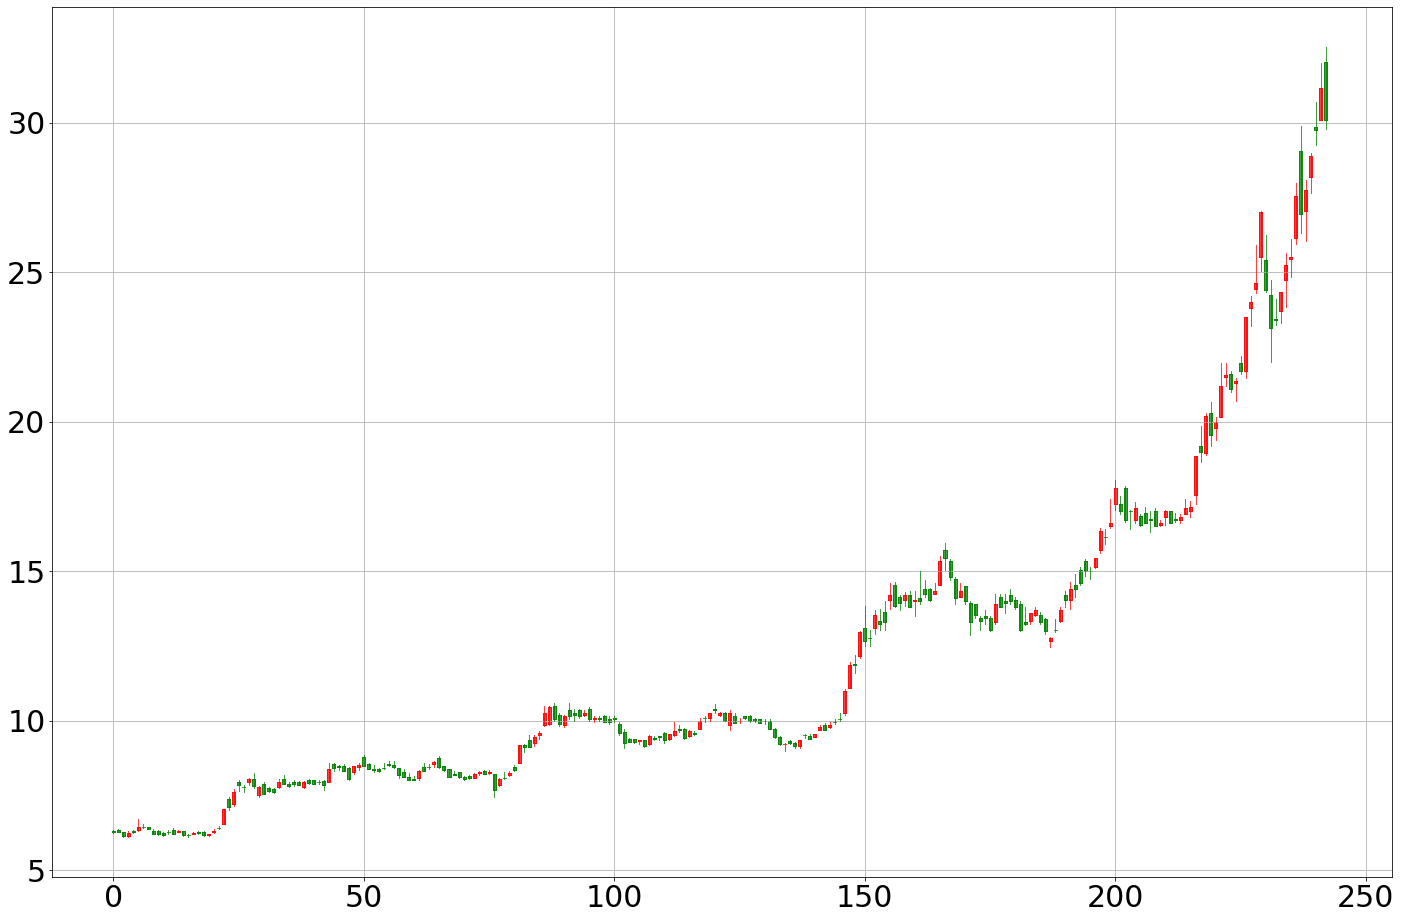

In [8]:
from mplfinance.original_flavor import candlestick2_ochl
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(1, 1, 1)
candlestick2_ochl(ax,All_data['開盤價'].values,All_data['收盤價'].values,
                  All_data['最高價'].values,All_data['最低價'].values,
                 width=0.6,colorup="r",colordown="g",alpha=0.75)
plt.grid()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# 繪製均線

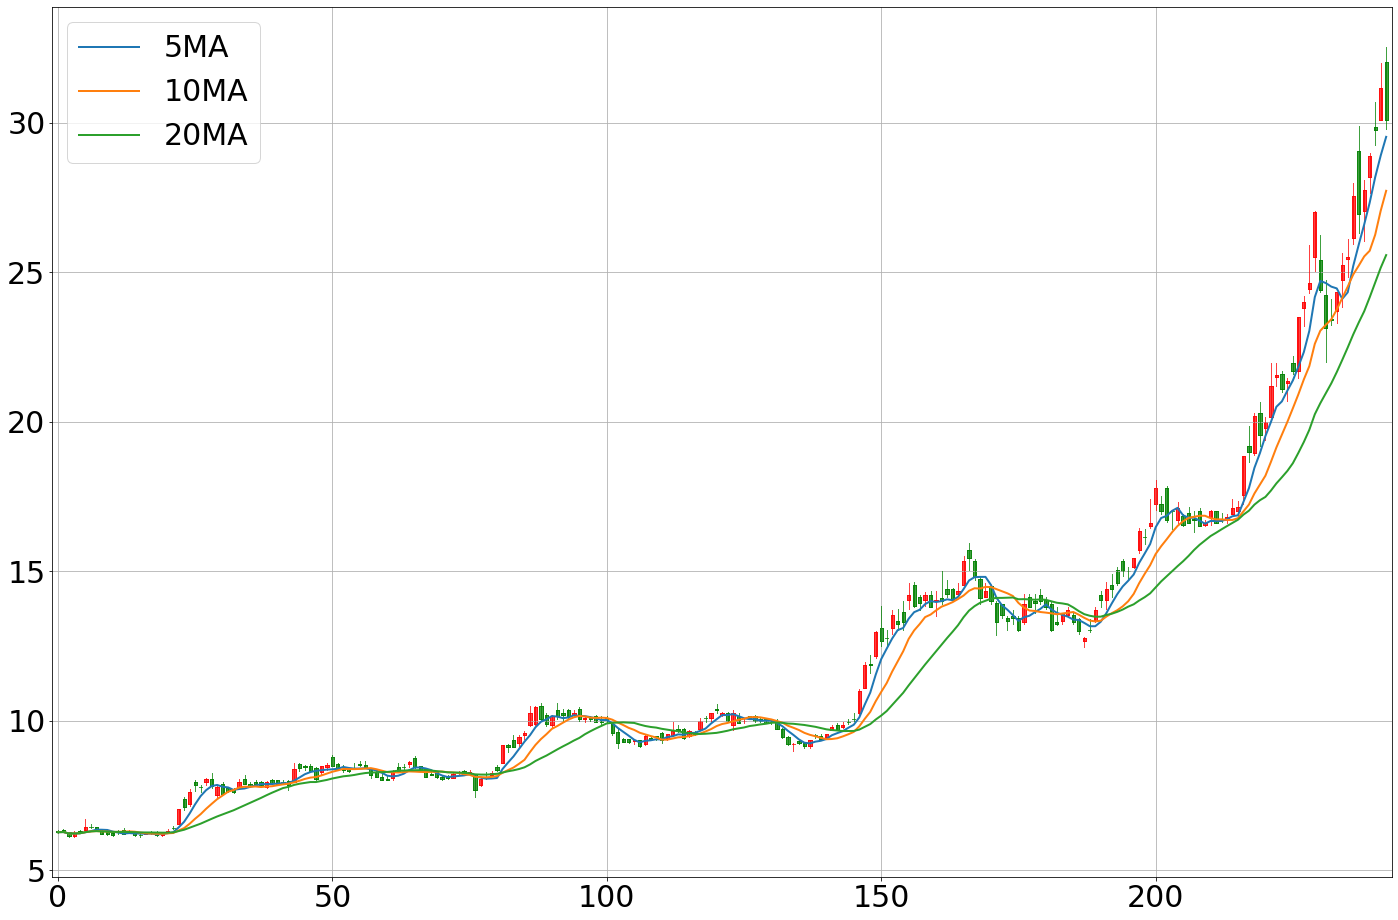

In [9]:
x=np.linspace(0,len(All_data)-1,len(All_data))
y=np.array(All_data['收盤價'].values)
y_05=np.zeros(len(y))
for i in range(0,len(y)):
    if(i<4):
        y_05[i]=sum(y[:i+1])/(i+1)
    else:
        y_05[i]=sum(y[(i-4):(i+1)])/5
y_10=np.zeros(len(y))
for i in range(0,len(y)):
    if(i<9):
        y_10[i]=sum(y[:i+1])/(i+1)
    else:
        y_10[i]=sum(y[(i-9):(i+1)])/10
y_20=np.zeros(len(y))
for i in range(0,len(y)):
    if(i<19):
        y_20[i]=sum(y[:i+1])/(i+1)
    else:
        y_20[i]=sum(y[(i-19):(i+1)])/20
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(1, 1, 1)
candlestick2_ochl(ax,All_data['開盤價'].values,All_data['收盤價'].values,
                  All_data['最高價'].values,All_data['最低價'].values,
                 width=0.6,colorup="r",colordown="g",alpha=0.75)
plt.plot(x,y_05,label="5MA",linewidth=2)
plt.plot(x,y_10,label="10MA",linewidth=2)
plt.plot(x,y_20,label="20MA",linewidth=2)
plt.legend(loc="upper left",fontsize=30)
plt.grid()
plt.xlim(min(x)-1,max(x)+1)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# k-Nearest Neighbor

In [10]:
N=len(All_data)
ED=np.zeros((N,N))
for i in range(0,N):
    temp=np.ones(N)*x[i]
    ED[i,:]=np.sqrt((temp-x)**2)
h=0.1
xx=np.arange(min(x),max(x),h)
Plot_ED=np.zeros((len(xx),N))
for i in range(0,len(xx)):
    temp=np.ones(N)*xx[i]
    Plot_ED[i,:]=np.sqrt((temp-x)**2)

# kNN Regressor

In [11]:
def kNN(ED,Plot_ED,xx,y,k):
    for i in range(0,N):
        ED_sort_index=np.argsort(ED[i,:])
        Candid=ED_sort_index[0:k]
        y_train[i]=sum(y[Candid])/k
    y_plot=np.zeros(len(xx))
    for i in range(0,len(xx)):
        Plot_ED_sort_index=np.argsort(Plot_ED[i,:])
        Candid=Plot_ED_sort_index[0:k]
        y_plot[i]=sum(y_train[Candid])/k
    plt.plot(xx,y_plot,linewidth=2,label="kNN (k="+str(k)+")")

# PLOT

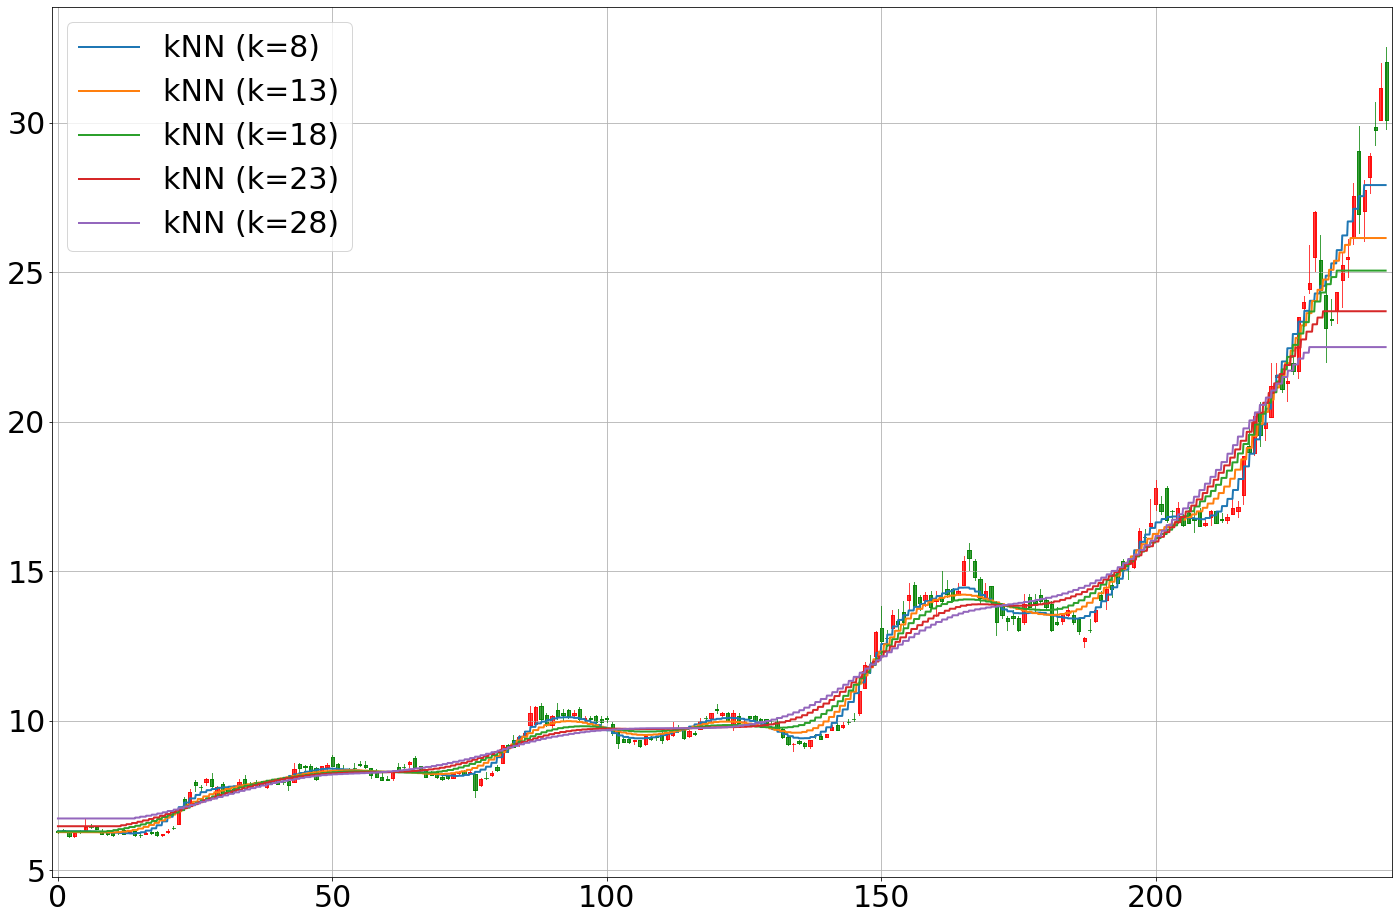

In [12]:
y_train=np.zeros(N)
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(1, 1, 1)
candlestick2_ochl(ax,All_data['開盤價'].values,All_data['收盤價'].values,
                  All_data['最高價'].values,All_data['最低價'].values,
                  width=0.6,colorup="r",colordown="g",alpha=0.75)
for k in range(1,6):
    kNN(ED,Plot_ED,xx,y,5*k+3)
plt.grid()
plt.legend(loc="upper left",fontsize=30)
plt.xlim(min(x)-1,max(x)+1)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()